In [55]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [56]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [57]:
import plotly.graph_objects as go
import plotly.express as px

In [58]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [59]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [60]:
data_baseline = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/pH/ph_baseline_2.6_cropped.nc')

In [61]:
data_oae = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/pH/ph_OAE_2.6_cropped.nc')

In [62]:
data_baseline = data_baseline.ph[0,:]
data_oae = data_oae.ph[0,:]

In [63]:
data_baseline = data_baseline.to_dataset(name='ph')
data_oae = data_oae.to_dataset(name='ph')

In [64]:
dataframe_base = data_baseline.sel(time_counter=slice('2090', '2100'))

In [65]:
dataframe_oae = data_oae.sel(time_counter=slice('2090', '2100'))

### Averaged Annual Amplitude of pH for the last ten years without OAE

In [110]:
ph_max_base = dataframe_base.resample(time_counter='AS').max('time_counter')

In [111]:
ph_min_base = dataframe_base.resample(time_counter='AS').min('time_counter')

In [112]:
ph_amplitude_base = ph_max_base['ph'] - ph_min_base['ph']

In [113]:
ph_amplitude_base = ph_amplitude_base.to_dataset()

In [114]:
ph_amplitude_base_map = ph_amplitude_base.ph.mean(dim=('time_counter'))

In [115]:
ph_amplitude_base_map = ph_amplitude_base_map.to_dataset()

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning:

All-NaN slice encountered



Text(0.5, 1.06, 'pH seasonal cycle change without OAE')

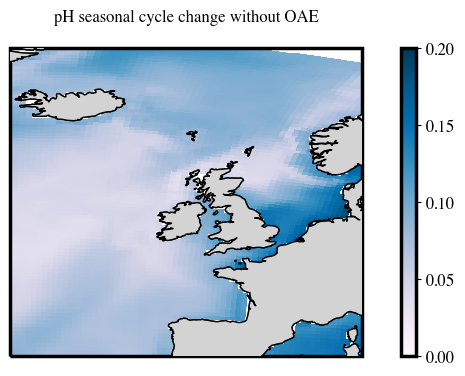

In [116]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im = ph_amplitude_base_map.ph.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, cmap="PuBu", vmin = 0, vmax = 0.2
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('pH seasonal cycle change without OAE', fontname="Times", fontsize=12, y=1.06)

### Averaged Annual Amplitude of pH for the last ten years with OAE

In [123]:
ph_max_oae = dataframe_oae.resample(time_counter='AS').max('time_counter')

In [124]:
ph_min_oae = dataframe_oae.resample(time_counter='AS').min('time_counter')

In [125]:
ph_amplitude_oae = ph_max_oae['ph'] - ph_min_oae['ph']

In [126]:
ph_amplitude_oae = ph_amplitude_oae.to_dataset()

In [127]:
ph_amplitude_oae_map = ph_amplitude_oae.ph.mean(dim=('time_counter'))

In [128]:
ph_amplitude_oae_map = ph_amplitude_oae_map.to_dataset()

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning:

All-NaN slice encountered



Text(0.5, 1.06, 'pH seasonal cycle change with OAE')

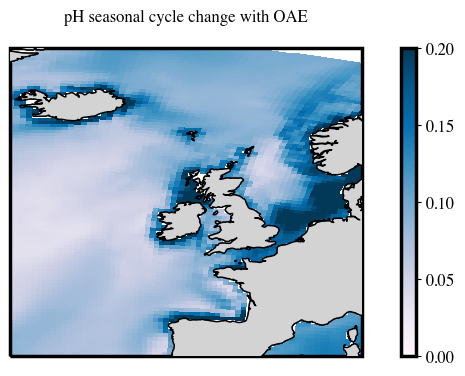

In [129]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im = ph_amplitude_oae_map.ph.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, cmap="PuBu", vmin = 0, vmax = 0.2
)

ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('pH seasonal cycle change with OAE', fontname="Times", fontsize=12, y=1.06)

### Δ pH between Baseline and OAE scenario

In [130]:
ph_amplitude_change = ph_amplitude_oae - ph_amplitude_base

In [131]:
ph_amplitude_change_map = ph_amplitude_change.ph.mean(dim=('time_counter'))

In [132]:
ph_amplitude_change_map = ph_amplitude_change_map.to_dataset()

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning:

All-NaN slice encountered



Text(0.5, 1.06, 'pH seasonal cycle change with OAE')

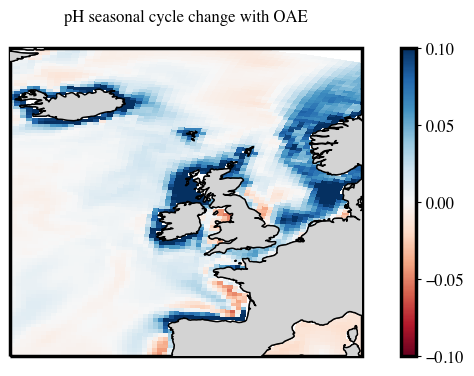

In [133]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im = ph_amplitude_change_map.ph.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, cmap="RdBu", vmin = -0.1, vmax = 0.1
)

ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('pH seasonal cycle change with OAE', fontname="Times", fontsize=12, y=1.06)

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:540: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/geomar/lib/python3.7/site-packages/dask/array/reductions.py:569: RuntimeWarning:

All-NaN slice encountered



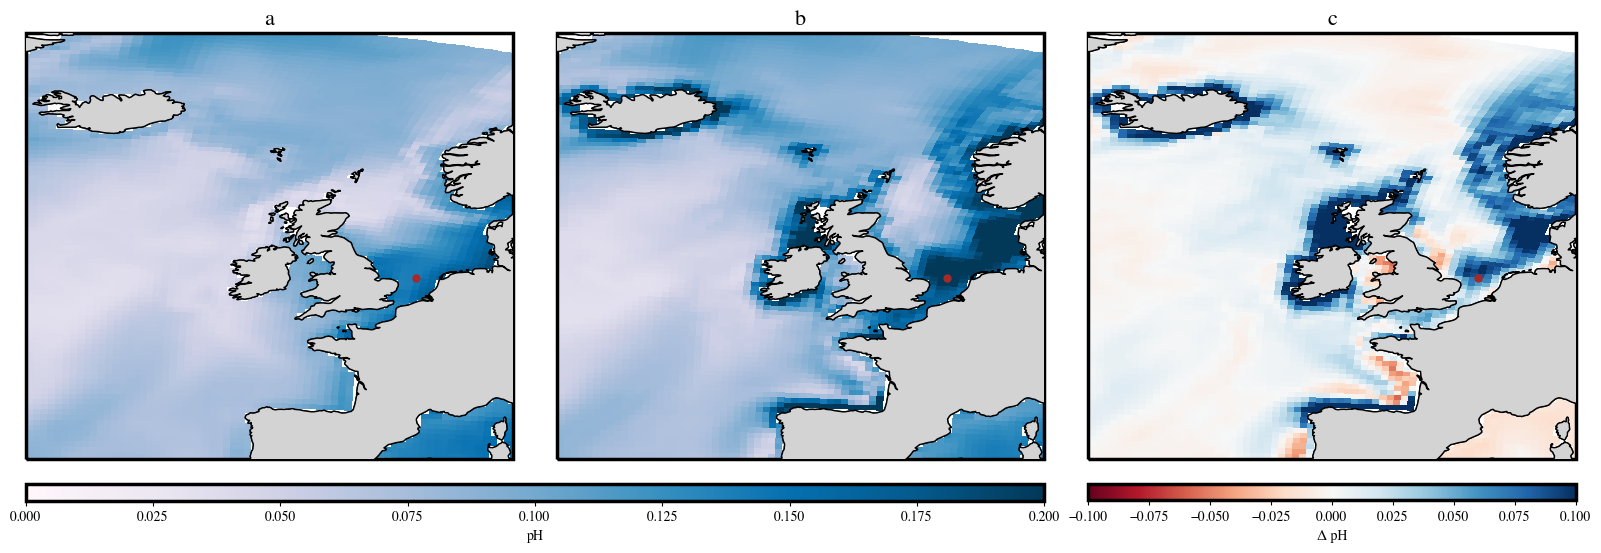

In [134]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
plt.subplots_adjust(wspace=0.09, hspace=0.05)

im1 = ph_amplitude_base_map.ph.plot.pcolormesh(
            ax=ax1, x="nav_lon", y="nav_lat",
            vmin=0,
            vmax=0.2,
            cmap="PuBu",
            add_colorbar=False
    )

    
im2 = ph_amplitude_oae_map.ph.plot.pcolormesh(
            ax=ax2, x="nav_lon", y="nav_lat",
            vmin=0,
            vmax=0.2,
            cmap="PuBu",
            add_colorbar=False
    )

im3 = ph_amplitude_change_map.ph.plot.pcolormesh( 
            ax=ax3, x="nav_lon", y="nav_lat",
            vmin=-0.1,
            vmax=0.1,
            cmap="RdBu", 
            add_colorbar=False
    ) 
    
ax1.set_title("a", fontsize=16, y=1)
ax2.set_title("b", fontsize=16, y=1)
ax3.set_title("c", fontsize=16, y=1)    
    
ax1.coastlines()
ax1.set_extent([-25, 10, 40, 70])  
ax1.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

ax2.coastlines()
ax2.set_extent([-25, 10, 40, 70]) 
ax2.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

ax3.coastlines()
ax3.set_extent([-25, 10, 40, 70])
ax3.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

cbar = plt.colorbar(im1, ax = [ax1, ax2], aspect = 60, pad=0.04, location='bottom')
cbar.set_label('pH', fontsize=10)

cb3= plt.colorbar(im3,ax=ax3, aspect = 30, pad=0.04, location='bottom')
cb3.set_label('Δ pH', fontsize=10)

font_size = 10
cb3.ax.tick_params(labelsize=font_size)
cbar.ax.tick_params(labelsize=font_size)

pass

ax1.plot(3, 53, "o", color='brown', markersize=5)
ax2.plot(3, 53, "o", color='brown', markersize=5)
ax3.plot(3, 53, "o", color='brown', markersize=5)

#fig.suptitle('Seasonal Cycle Amplitude of pH (average over the last decade)', fontname='Times', fontsize=15, y=0.81)
plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/pH/figs/ph_seasonal_cycle.png')

### Amplitude at Location Point

In [206]:
ph_base_sliced = dataframe_base.where((3 < dataframe_base.nav_lon) & (dataframe_base.nav_lon < 3.1) & (52 < dataframe_base.nav_lat) & (dataframe_base.nav_lat < 53), drop=True)
ph_oae_sliced = dataframe_oae.where((3 < dataframe_oae.nav_lon) & (dataframe_oae.nav_lon < 3.1) & (52 < dataframe_oae.nav_lat) & (dataframe_oae.nav_lat < 53), drop=True)

In [207]:
ph_max_base_slc = ph_base_sliced.resample(time_counter='AS').max('time_counter')

In [208]:
ph_min_base_slc = ph_base_sliced.resample(time_counter='AS').min('time_counter')

In [209]:
ph_amplitude_base_slc = ph_max_base_slc['ph'] - ph_min_base_slc['ph']

In [210]:
ph_amplitude_base_slc = ph_amplitude_base_slc.to_dataset(name='ph')

In [211]:
ph_max_base_slc = ph_max_base_slc.ph.mean(dim=('time_counter'))
ph_min_base_slc = ph_min_base_slc.ph.mean(dim=('time_counter'))
ph_amplitude_base_slc = ph_amplitude_base_slc.ph.mean(dim=('time_counter'))

In [212]:
ph_max_oae_slc = ph_oae_sliced.resample(time_counter='AS').max('time_counter')

In [213]:
ph_min_oae_slc = ph_oae_sliced.resample(time_counter='AS').min('time_counter')

In [194]:
ph_amplitude_oae_slc = ph_max_oae_slc['ph'] - ph_min_oae_slc['ph']

In [195]:
ph_amplitude_oae_slc = ph_amplitude_oae_slc.to_dataset(name='ph')

In [196]:
ph_max_oae_slc = ph_max_oae_slc.ph.mean(dim=('time_counter'))
ph_min_oae_slc = ph_min_oae_slc.ph.mean(dim=('time_counter'))
ph_amplitude_oae_slc = ph_amplitude_oae_slc.ph.mean(dim=('time_counter'))

In [197]:
ph_max_oae_slc = ph_max_oae_slc.to_dataframe()
ph_min_oae_slc = ph_min_oae_slc.to_dataframe()

In [198]:
ph_oae_sliced = ph_oae_sliced.to_dataframe()
ph_oae_sliced = ph_oae_sliced.reset_index()